<a href="https://colab.research.google.com/github/jbwenjoy/000545000/blob/jbw/CIS_545_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/jbwenjoy/000545000/blob/jbw/CIS_545_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIS 5450 Final Project - Spring 2025**
## Group Member:
Yiyan Liang: edgarl@seas.upenn.edu
<br>Bowen Jiang: jbwenjoy@seas.upenn.edu
<br>Binglong Bao: binglong@seas.upenn.edu

# **1. Introduction and Background**

## **1.1 Problem Statement**
Airfare pricing in the U.S. domestic airline industry has long been a topic of interest due to its dynamic and opaque nature. From 1993 to 2024, the industry has undergone substantial changes including fluctuating fuel prices, shifting market competition, and evolving consumer behavior. These factors make it difficult for travelers to anticipate ticket prices and for airlines to optimize revenue through effective pricing strategies.

Despite the abundance of large-scale data, there remains a lack of comprehensive, data-driven analyses that systematically explore the relationship between these variables and airfare trends. One of our team members is planning to book a flight during a holiday period and is particularly interested in understanding what drives changes in ticket prices. This curiosity sparked our interest and motivated us to investigate whether historical data could reveal meaningful patterns that help consumers make more informed travel decisions.

## **1.2 Objective and Value Proposition**
The objective of this project is to conduct a thorough exploratory data analysis (EDA) of U.S. domestic airline fares from 1993 to 2024, and to develop predictive models that capture how different variables affect airfare pricing. The project integrates route and fare data with external economic indicators such as oil prices to uncover insights into airfare dynamics.

The primary goals are:

- **Understand Key Drivers of Pricing:** Investigate how factors like route distance, seasonality, fuel costs, airline competition, and passenger volume affect airfares.

- **Support Strategic Planning:** Provide insights to airline operators and policymakers for optimizing pricing strategies and understanding long-term market shifts.

- **Build a Predictive Model:** Develop regression models capable of forecasting average fares given known market and economic conditions.

The value proposition of this project lies in offering a systematic and scalable framework for analyzing complex fare-setting behavior across three decades. For consumers, it may lead to better fare predictions and smarter booking decisions. For industry stakeholders, it provides tools for data-informed pricing and long-term planning.

# **2. Data Loading and Preprocessing**



## **2.1 📊 Overview of the Dataset**
This project uses two complementary datasets to explore the relationship between airline ticket pricing and external economic factors, particularly oil prices. The integration of these datasets allows for a data-driven analysis of historical fare trends in the U.S. domestic airline market over the past three decades.
### **✈️ US Airline Flight Routes and Fares (1993–2024)**
**Source**: [Kaggle Dataset – US Airline Flight Routes and Fares (1993–2024)](https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024)

This dataset provides detailed information on airline flight routes, average fares, passenger volume, and carrier competition across the United States.

**Key Features:**
- **Year & Quarter**: Time identifiers for each record, from 1993 to 2024.
- **City1 & City2**: Names of origin and destination cities.
- **Airport Codes**: Origin and destination airport identifiers.
- **nsmiles**: Distance between airports in miles.
- **Passengers**: Number of passengers on each route.
- **Fare**: Average fare for the route.
- **Carrier Info**: Largest and lowest-fare carrier codes, their market shares, and corresponding fares.
- **Geographical Coordinates**: Latitude and longitude of both origin and destination cities.


The dataset enables long-term trend analysis of pricing behavior, route dynamics, and airline competition in the domestic travel sector.

---

### **🛢️ WTI Crude Oil Daily Prices**

Sourced from [DataHub](https://datahub.io/core/oil-prices), this dataset provides historical daily spot prices for West Texas Intermediate (WTI) crude oil.

**Key Features:**
- **Date**: Daily timestamps for each price record.
- **Price**: The WTI crude oil price in USD per barrel.

This dataset supports economic analysis and helps model the impact of fuel prices on airline operating costs.  

By combining historical airfare and fuel price data, this project aims to:
- Uncover patterns in ticket pricing.
- Investigate the impact of fuel cost fluctuations on airline fares.
- Improve prediction accuracy using external economic indicators.

This integrated approach allows for a richer understanding of pricing behavior and supports more informed consumer and industry decisions.


## **2.2 Data Loading**

Import the relevant libraries for all stages of our report (pre-processing, exploratory data analysis, and model selection). These imports primarily span fundamental libraries such as `pandas`, `matplotlib`, `numpy`, and `sklearn`.




In [45]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import TransformerMixin, BaseEstimator


warnings.filterwarnings('ignore')

In [46]:
# Run this cell to mount your drive (you will be prompted to sign in)
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


❗ ONLY RUN ONE OF THE TWO CELLS BELOW, SEE COMMENTS

In [47]:
"""
RUN THIS CELL IF YOU WANT TO LOAD CACHED DATASETS FROM GOOGLE DRIVE
DO NOT RUN THE NEXT CELL IF YOU DECIDE TO RUN THIS ONE!
"""

# If this is colab env, then mount the drive
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount('/content/drive')

    data_path_in_drive = '/content/drive/MyDrive/CIS545-final/'
    flights_data = '/content/drive/MyDrive/CIS545-final/US Airline Flight Routes and Fares 1993-2024.csv'
    fuel_data = '/content/drive/MyDrive/CIS545-final/flat-ui__data-Fri Mar 28 2025.csv'
    kaggle_key = '/content/drive/MyDrive/CIS545-final/kaggle.json'
else:
    print('Not running on CoLab')
    data_path_in_drive = './'
    flights_data = './US Airline Flight Routes and Fares 1993-2024.csv'
    fuel_data = './flat-ui__data-Fri Mar 28 2025.csv'
    kaggle_key = './kaggle.json'

# Check if these files exists
file_paths = [
    (data_path_in_drive, "Directory"),
    (flights_data, "File"),
    (fuel_data, "File"),
    (kaggle_key, "File")
]
file_exists = True
for path, file_type in file_paths:
    if not os.path.exists(path):
        file_exists = False
        if file_type == "Directory":
            os.makedirs(path)
            print(f"Directory '{path}' created successfully.")
        else:
            print(f"{file_type} '{path}' does not exist.")

    else:
        print(f"{file_type} '{path}' exists.")

Running on CoLab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directory '/content/drive/MyDrive/CIS545-final/' exists.
File '/content/drive/MyDrive/CIS545-final/US Airline Flight Routes and Fares 1993-2024.csv' does not exist.
File '/content/drive/MyDrive/CIS545-final/flat-ui__data-Fri Mar 28 2025.csv' does not exist.
File '/content/drive/MyDrive/CIS545-final/kaggle.json' does not exist.


In [48]:
"""
RUN THIS CELL IF YOU WANT TO DOWNLOAD ONLINE DATASETS FROM KAGGLE AND DATAHUB
DO NOT RUN THE PREVIOUS CELL IF YOU DECIDE TO RUN THIS ONE!
"""
try:
    file_exists
except NameError:
    file_exists = False
if not file_exists:
    # Create the kaggle directory and
    # (NOTE: Do NOT run this cell more than once unless restarting kernel)
    # !mkdir ~/.kaggle

    # Read the uploaded kaggle.json file
    # !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

    # Download flights dataset (DO NOT CHANGE)
    # !kaggle datasets download -d bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024
    # !unzip /content/us-airline-flight-routes-and-fares-1993-2024

    flights_data = 'US Airline Flight Routes and Fares 1993-2024.csv'
    flights_df = pd.read_csv(flights_data, low_memory=False)

    # Download WTI dataset (DO NOT CHANGE)
    url = "https://datahub.io/core/oil-prices/r/wti-daily.csv"
    oil_df = pd.read_csv(url)
    oil_df.to_csv("flat-ui__data-Fri Mar 28 2025.csv", index=False)
    fuel_data = 'flat-ui__data-Fri Mar 28 2025.csv'

## **2.3 Data Prepossessing**
### 🔍 Identified Data Challenges
- **Missing and Anomalous Values**: Both datasets contain potential null values and outliers that need to be addressed for accurate analysis.
- **Data Integration**: Airfare data is provided on a quarterly basis, while oil prices are reported daily. Proper aggregation and alignment are necessary to merge the two datasets effectively.

---

### 🛠️ Proposed Solutions

- **Outlier Detection and Filtering**: Use statistical thresholds to filter out unreasonable values (e.g., negative fares or extremely long flights).
- **Handling Missing Values**: Apply appropriate methods such as row filtering, median imputation, or interpolation to manage missing entries.
- **Quarter-Based Aggregation**: Convert daily oil price data into quarterly averages to match the structure of the airfare dataset.


### **2.3.1 Flight Data**

In [49]:
df_original = pd.read_csv(flights_data, low_memory=False)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [50]:
# Checking Duplicates
duplicates = df_original.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [51]:
df_original.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [52]:
df_original.sample(3)

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
237858,Table1a,2023,1,32575,32467,"Los Angeles, CA (Metropolitan Area)","Miami, FL (Metropolitan Area)",13891,13303,ONT,...,319.97,AA,0.4489,355.16,F9,0.1002,109.77,NaN,NaN,202311389113303ONTMIA
128643,Table 1a,2010,2,30615,31703,"El Paso, TX","New York City, NY (Metropolitan Area)",11540,12953,ELP,...,188.53,AA,0.6800,189.19,CO,0.1200,172.56,"El Paso, TX\n(31.76006, -106.492257)","New York City, NY (Metropolitan Area)\n(40.123...",201021154012953ELPLGA
215296,Table1a,2019,3,30721,31714,"Boston, MA (Metropolitan Area)","Fort Myers, FL",10721,14635,BOS,...,177.23,B6,0.8294,174.18,NK,0.0156,84.69,"(42.358894, -71.056742)","(40.253979, -103.801495)",201931072114635BOSRSW


In [53]:
df_original.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


In [54]:
print(df_original.shape)

# Handling Missing Values
df_clean = df_original.copy()
missing_values = df_clean.isnull().sum()
print("------MISS VALUES------")
print(missing_values.to_string())
df_clean = df_clean.dropna()
df_clean = df_clean.dropna(axis=1)
df_clean = df_clean.drop_duplicates()

print(df_clean.shape)

(245955, 23)
------MISS VALUES------
tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1540
large_ms           1540
fare_lg            1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
tbl1apk               0
(205189, 23)


In [55]:
df_clean.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,205189.000000,205189.000000,205189.000000,205189.000000,205189.000000,205189.000000,205189.000000,205189.000000,205189.000000,205189.00000,205189.000000,205189.000000,205189.000000
mean,2006.203344,2.453821,31557.506255,32179.255686,12442.147869,13253.934041,1187.950392,292.772936,215.817393,0.65732,216.240639,0.437262,188.975523
std,7.357540,1.114433,1087.876837,1230.573397,1434.010417,1426.996038,705.472703,498.710148,79.491791,0.22495,84.577098,0.329797,73.010497
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.10000,50.000000,0.010000,50.000000
25%,2000.000000,1.000000,30721.000000,31057.000000,11193.000000,12197.000000,625.000000,21.000000,161.900000,0.47620,158.860000,0.150000,139.230000
50%,2006.000000,2.000000,31423.000000,32211.000000,12339.000000,13303.000000,1020.000000,111.000000,206.810000,0.65000,205.450000,0.340000,179.510000
75%,2012.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,332.000000,260.130000,0.86000,261.200000,0.729700,227.470000
max,2020.000000,4.000000,35412.000000,35412.000000,16440.000000,15919.000000,2724.000000,8023.000000,3377.000000,1.00000,2725.600000,1.000000,2725.600000


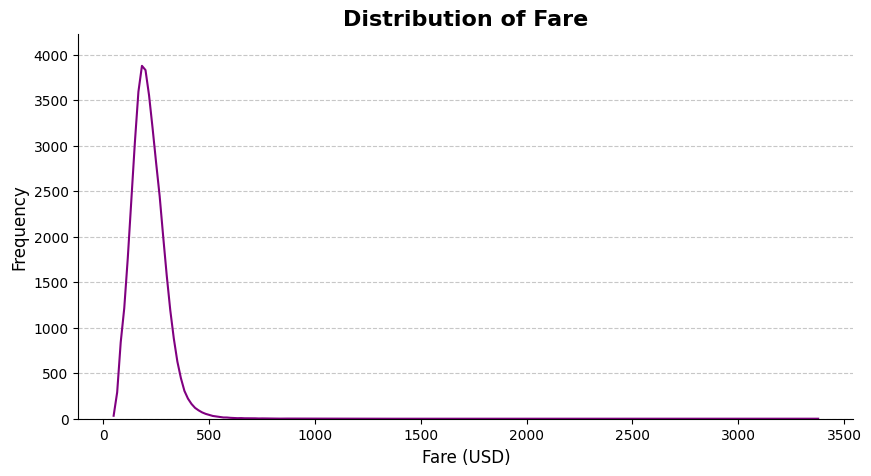

In [56]:
# Have a look at the distribution of fare, to see if there are outliers
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['fare'], kde=True, color='#800080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Fare', fontsize=16, fontweight='bold')
plt.xlabel('Fare (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added gridlines for better readability
sns.despine()  # Remove top and right spines for a cleaner look
plt.show()

❗ BE CAREFUL: YOU CAN ONLY RUN BELOW ONCE WITHOUT RERUNNING THE CELL ABOVE!

In [57]:
"""
YOU CAN ONLY RUN THIS CELL ONCE!
OR YOU NEED TO RERUN THE CELL ABOVE THIS
"""

# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df_clean.select_dtypes(include=['float64', 'int64']))

# Identify outliers
outlier_score = 3
df_outliers = df_clean[(z_scores > outlier_score).any(axis=1) | (z_scores < -outlier_score).any(axis=1)]
print(df_outliers.shape)

# Remove rows with outliers based on Z-score
df_clean = df_clean[(z_scores < outlier_score).all(axis=1) & (z_scores > -outlier_score).all(axis=1)]
print(df_clean.shape)
df_clean.sample(3)

(9513, 23)
(195676, 23)


,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
11003,Table 1a,2008,2,30721,30852,"Boston, MA (Metropolitan Area)","Washington, DC (Metropolitan Area)",10721,10821,BOS,...,129.52,FL,0.6900,125.86,FL,0.6900,125.86,"Boston, MA (Metropolitan Area)\n(42.358894, -7...","Washington, DC (Metropolitan Area)\n(38.892062...",200821072110821BOSBWI
10974,Table 1a,2007,2,30977,34570,"Chicago, IL","Reno, NV",13930,14570,ORD,...,198.75,AA,0.5800,199.92,AA,0.5800,199.92,"Chicago, IL\n(41.775002, -87.696388)","Reno, NV\n(30.177159, -95.162771)",200721393014570ORDRNO
221227,Table1a,2020,2,30423,32467,"Austin, TX","Miami, FL (Metropolitan Area)",10423,11697,AUS,...,139.75,AA,0.5925,118.54,AA,0.5925,118.54,"(30.264979, -97.746598)","(44.977479, -93.264346)",202021042311697AUSFLL


### **2.3.2 Fuel Price Data**

In [58]:
fuel_df_original = pd.read_csv(fuel_data, low_memory=False)
fuel_df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9895 entries, 0 to 9894
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9895 non-null   object 
 1   Price   9895 non-null   float64
dtypes: float64(1), object(1)
memory usage: 154.7+ KB


In [59]:
# Checking Duplicates
duplicates = fuel_df_original.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [60]:
fuel_df_original.head()

,Date,Price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [61]:
fuel_df_original.sample(3)

,Date,Price
7713,2016-08-01,40.05
1763,1992-11-24,20.06
9033,2021-11-04,78.88


In [62]:
print(fuel_df_original.shape)

# Handling Missing Values
fuel_df_clean = fuel_df_original.copy()
fuel_df_clean = fuel_df_clean.dropna()
fuel_df_clean = fuel_df_clean.dropna(axis=1)
fuel_df_clean = fuel_df_clean.drop_duplicates()

print(fuel_df_clean.shape)

(9895, 2)
(9895, 2)


Since the fuel price data is very clean, we don't need further cleaning.

# **3. Exploratory Data Analysis (EDA)**

We primarily focused on visualizing data distributions to have a brief concept of the data ranges, and also the relationships between fare and possible deciding factors (fuel price, distance, passenger count, carrier type, etc) to understand possible correlations.

In [63]:
df = df_clean.copy()
fuel_df = fuel_df_clean.copy()

## **3.1 Distribution of Fare, distance and fuel price**

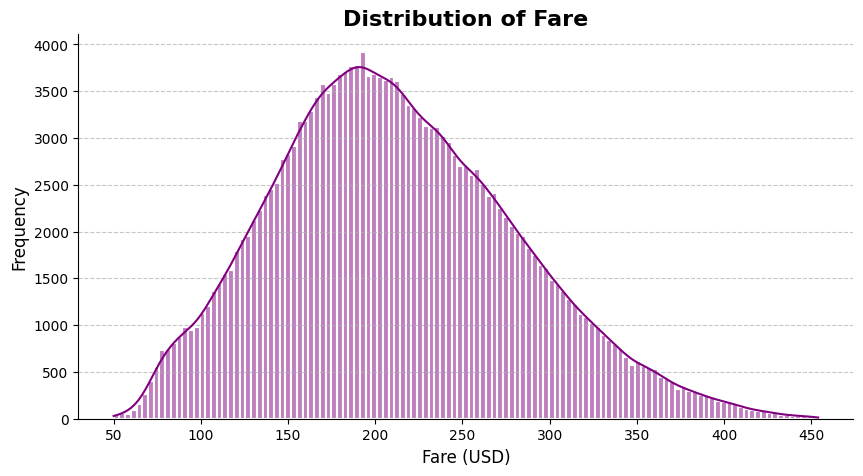

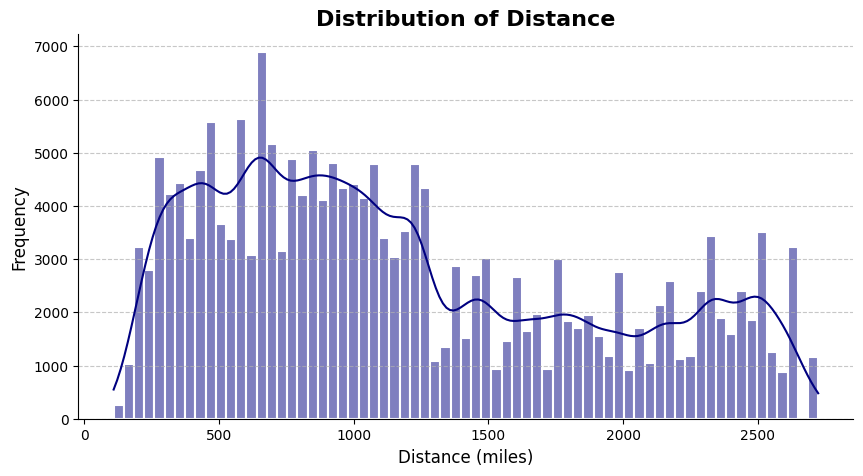

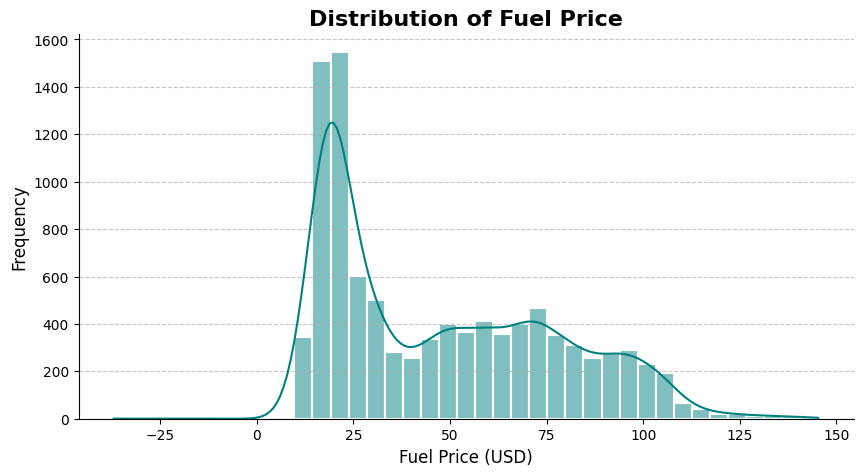

In [64]:
# Distribution of fare
plt.figure(figsize=(10, 5))
sns.histplot(df['fare'], kde=True, color='#800080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Fare', fontsize=16, fontweight='bold')
plt.xlabel('Fare (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added gridlines for better readability
sns.despine()  # Remove top and right spines for a cleaner look
plt.show()

# Distribution of distance
plt.figure(figsize=(10, 5))
sns.histplot(df['nsmiles'], kde=True, color='#000080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Distance', fontsize=16, fontweight='bold')
plt.xlabel('Distance (miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

# Distribution of fuel price
plt.figure(figsize=(10, 5))
sns.histplot(fuel_df['Price'], kde=True, color='#008080', edgecolor='white', linewidth=1.5)
plt.title('Distribution of Fuel Price', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

We can see that:

* Airfare centers around 200 USD, while there are extreme values, it's still very symmetrical.

* Distance range from about 200 miles to over 2500 miles, with 1500 miles serving as a dividing line. The distribution is fairly uniform both below and above 1,500 miles, but the average frequency in these two segments differs by about a factor of two.

* Fuel price ranges greatly over the years.

## **3.2 US Flight Fare and Distance**

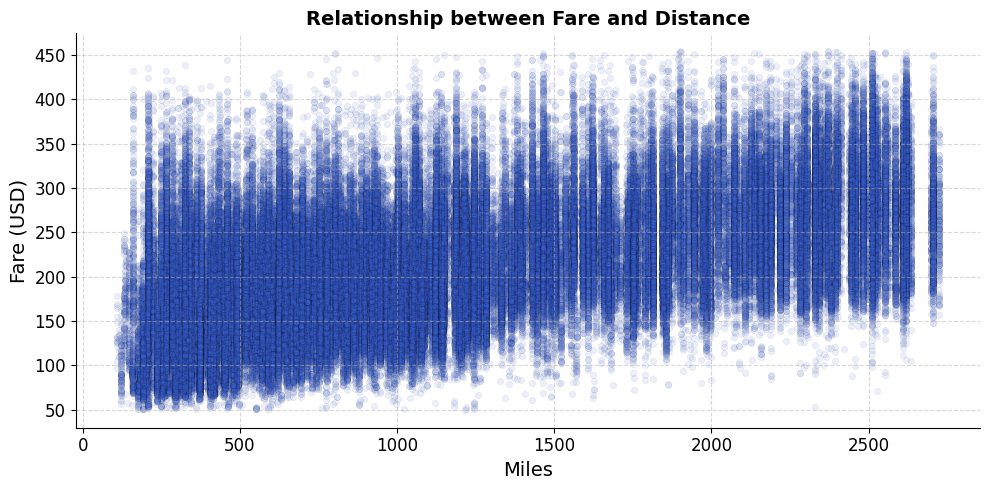

In [83]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='nsmiles', y='fare', data=df, alpha=0.1, color='royalblue', edgecolor='k', s=20)
plt.title('Relationship between Fare and Distance', fontsize=14, fontweight='bold')
plt.xlabel('Miles', fontsize=14)
plt.ylabel('Fare (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

From the plot:

* There is an approximately linear relationship between airfare and the distance of the route.

* The slope is small and the variance is very large. This aligns with our real-world experience that airfare can vary greatly.

## **3.3 US Flight Fare and Fuel Price over Time**

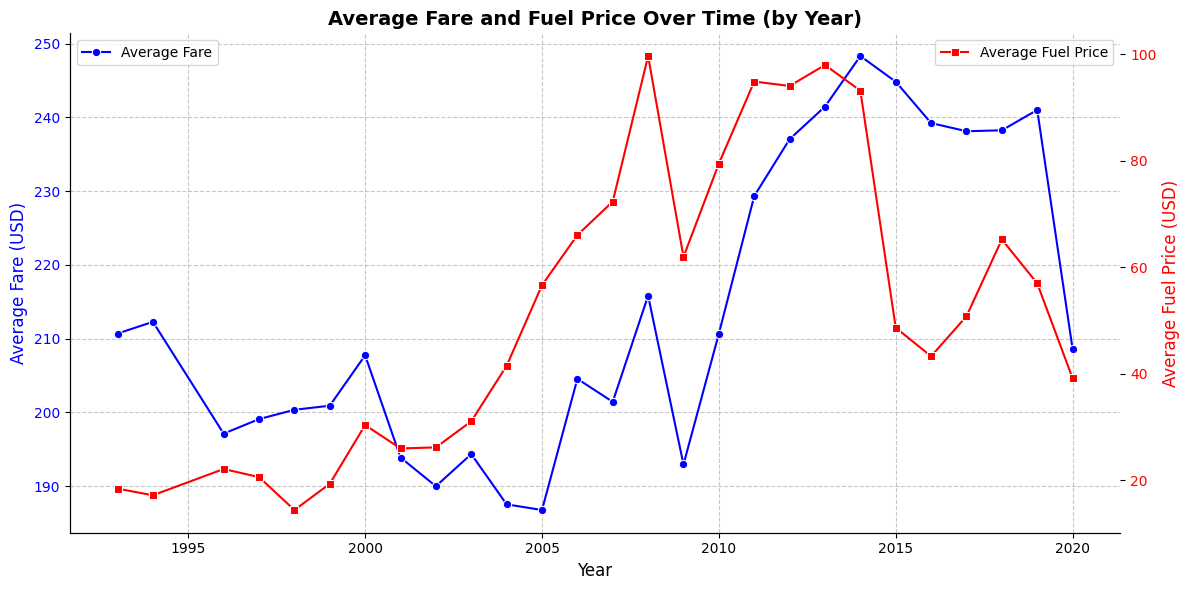

In [84]:
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])
fuel_df['Year'] = fuel_df['Date'].dt.year
avg_fuel_price_per_year = fuel_df.groupby('Year')['Price'].mean().reset_index()
avg_fare_per_year = df.groupby('Year')['fare'].mean().reset_index()

# Find common years between fare and fuel data
common_years = list(set(avg_fare_per_year['Year']) & set(avg_fuel_price_per_year['Year']))

# Filter data for common years
avg_fare_per_year = avg_fare_per_year[avg_fare_per_year['Year'].isin(common_years)]
avg_fuel_price_per_year = avg_fuel_price_per_year[avg_fuel_price_per_year['Year'].isin(common_years)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Avr fare (ax1)
sns.lineplot(x='Year', y='fare', data=avg_fare_per_year, marker='o', color='blue', ax=ax1, label='Average Fare')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Fare (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper left')

# Avr fuel price (ax2)
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='Price', data=avg_fuel_price_per_year, marker='s', color='red', ax=ax2, label='Average Fuel Price')
ax2.set_ylabel('Average Fuel Price (USD)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('red')
plt.title('Average Fare and Fuel Price Over Time (by Year)', fontsize=14, fontweight='bold')
# fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))
sns.despine()
plt.tight_layout()

plt.show()

From the plot:

* We can see some correlation between flight ticket fare and fuel price, but averging by year is somewhat rough.

* Below we also plot base on quarterly average, and we can see that the fluctuations of the two are more obvious.

* Airfare tend to change a little bit later/slower than the fuel price.

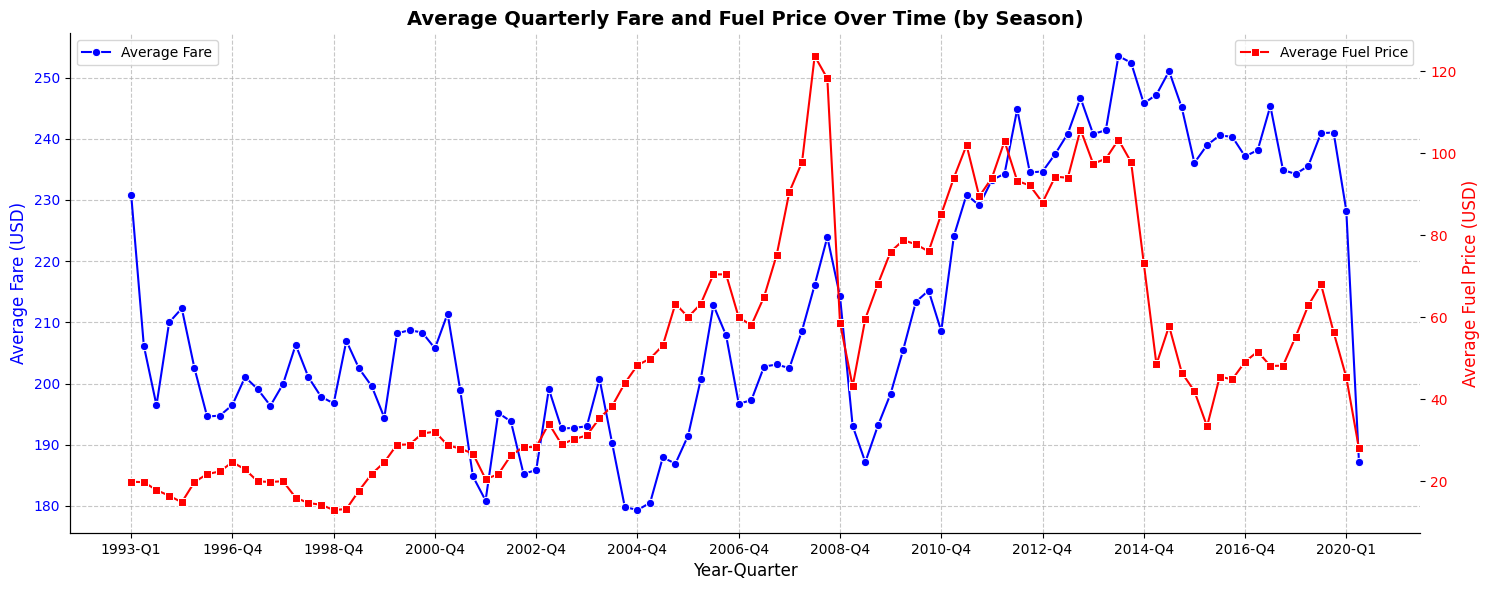

In [85]:
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])
fuel_df['Year'] = fuel_df['Date'].dt.year
fuel_df['Quarter'] = fuel_df['Date'].dt.quarter
avg_fuel_price_per_quarter = fuel_df.groupby(['Year', 'Quarter'])['Price'].mean().reset_index()

avg_fare_per_quarter = df.groupby(['Year', 'quarter'])['fare'].mean().reset_index()
avg_fare_per_quarter = avg_fare_per_quarter.rename(columns={'quarter': 'Quarter'})

# Merge and filter data for common quarters
merged_df = pd.merge(avg_fare_per_quarter, avg_fuel_price_per_quarter, on=['Year', 'Quarter'], how='inner')
merged_df['Year-Quarter'] = merged_df['Year'].astype(str) + '-Q' + merged_df['Quarter'].astype(str)

fig, ax1 = plt.subplots(figsize=(15, 6))

# Avr flight fare (ax1)
sns.lineplot(x='Year-Quarter', y='fare', data=merged_df, marker='o', color='blue', ax=ax1, label='Average Fare')
ax1.set_xlabel('Year-Quarter', fontsize=12)
ax1.set_ylabel('Average Fare (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper left')

# Avr fuel price (ax2)
ax2 = ax1.twinx()
sns.lineplot(x='Year-Quarter', y='Price', data=merged_df, marker='s', color='red', ax=ax2, label='Average Fuel Price')
ax2.set_ylabel('Average Fuel Price (USD)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('red')
ax2.legend(loc='upper right')

plt.title('Average Quarterly Fare and Fuel Price Over Time (by Season)', fontsize=14, fontweight='bold')
# fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))

plt.xticks(rotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(15)) # Maximum num of x labels

# Improve aesthetics
sns.despine()
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

## **3.4 US Flight Fare and Passenger Count**

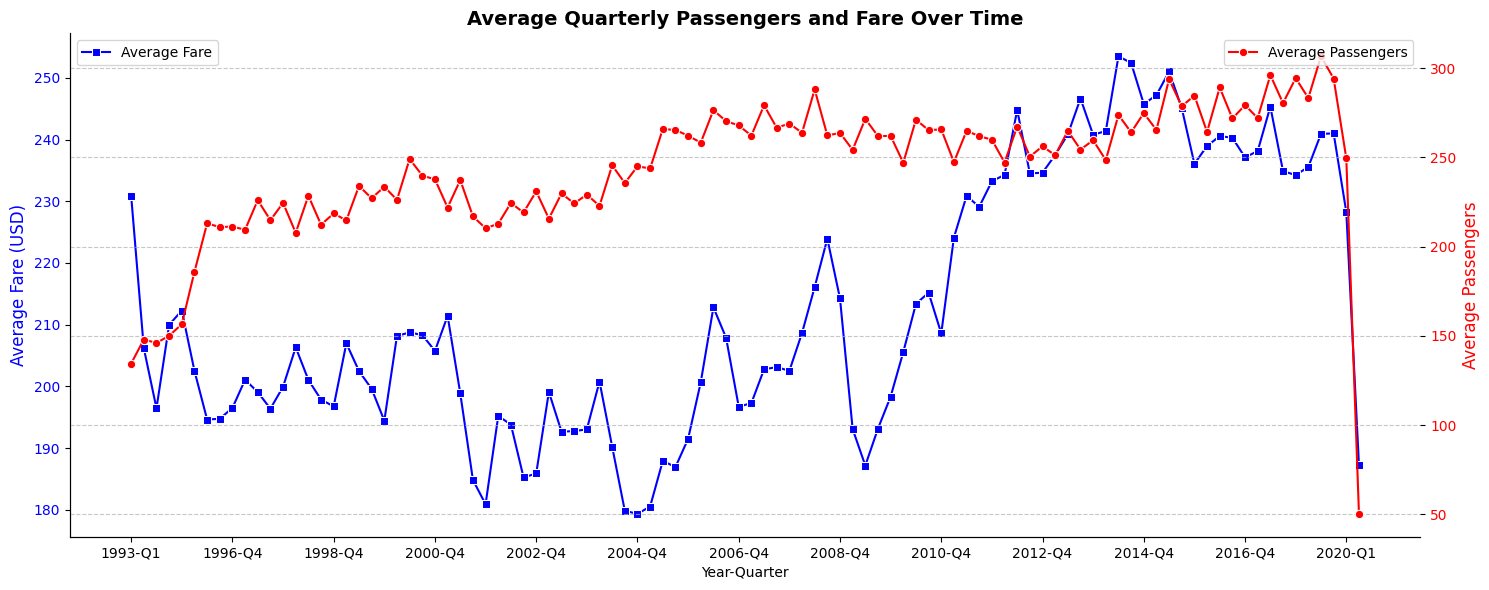

In [86]:
avg_passengers_per_quarter = df.groupby(['Year', 'quarter'])['passengers'].mean().reset_index()
avg_fare_per_quarter = df.groupby(['Year', 'quarter'])['fare'].mean().reset_index()

avg_passengers_per_quarter = avg_passengers_per_quarter.rename(columns={'quarter': 'Quarter'})
avg_fare_per_quarter = avg_fare_per_quarter.rename(columns={'quarter': 'Quarter'})

merged_df = pd.merge(avg_passengers_per_quarter, avg_fare_per_quarter, on=['Year', 'Quarter'], how='inner')
merged_df['Year-Quarter'] = merged_df['Year'].astype(str) + '-Q' + merged_df['Quarter'].astype(str)


fig, ax1 = plt.subplots(figsize=(15, 6))
sns.lineplot(x='Year-Quarter', y='fare', data=merged_df, marker='s', color='blue', ax=ax1, label='Average Fare')
ax1.set_ylabel('Average Fare (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
sns.lineplot(x='Year-Quarter', y='passengers', data=merged_df, marker='o', color='red', ax=ax2, label='Average Passengers')
ax2.set_xlabel('Year-Quarter', fontsize=12)
ax2.set_ylabel('Average Passengers', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(loc='upper right')

ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color('red')

plt.title('Average Quarterly Passengers and Fare Over Time', fontsize=14, fontweight='bold')
# fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.95))
plt.xticks(rotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(15))
sns.despine()
plt.tight_layout()

plt.show()

From the plot:

* Looks like there isn't a strong correlation between flight fare and passenger counts.

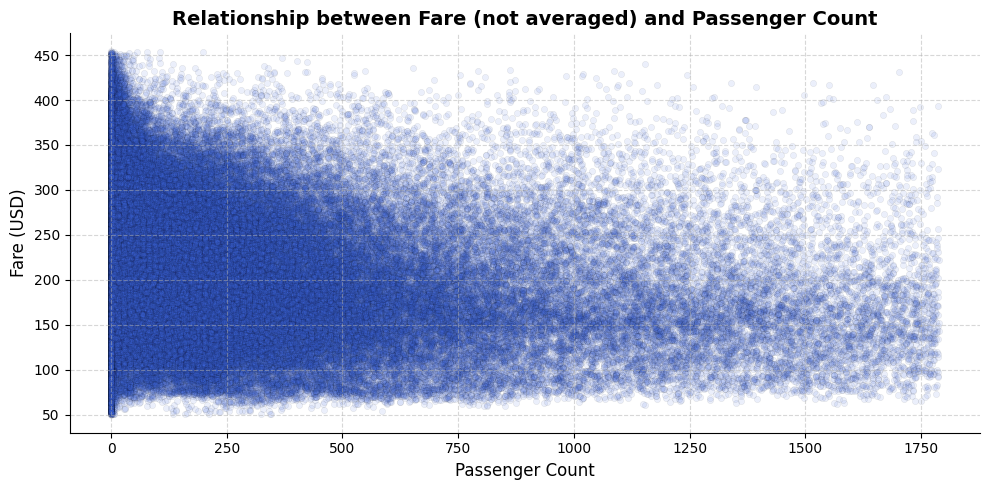

In [87]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='passengers', y='fare', data=df, alpha=0.1, color='royalblue', edgecolor='k', s=20)
plt.title('Relationship between Fare (not averaged) and Passenger Count', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Fare (USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

From the plot:

* We can see that the fares are more stable when there is a high passenger volume on a route.

## **3.5 US Flight Fare and Carrier Type for Same Routes**

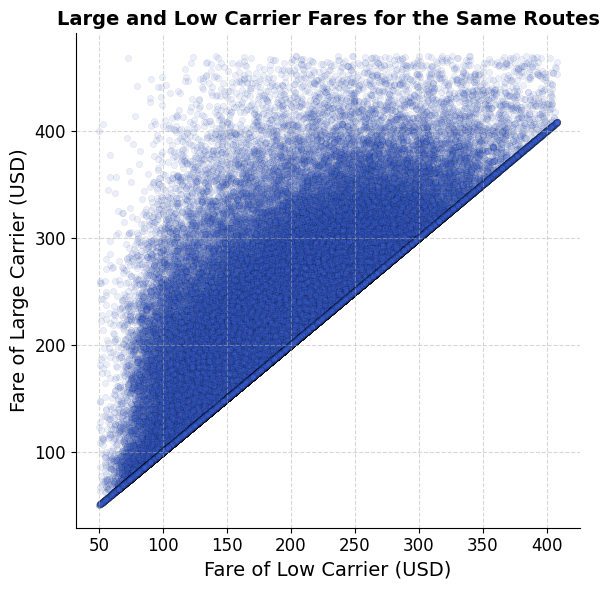

In [88]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='fare_low', y='fare_lg', data=df, alpha=0.1, color='royalblue', edgecolor='k', s=20)
plt.title('Large and Low Carrier Fares for the Same Routes', fontsize=14, fontweight='bold')
plt.xlabel('Fare of Low Carrier (USD)', fontsize=14)
plt.ylabel('Fare of Large Carrier (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

From this plot:

* We can roughly see that for air tickets between about 100-300 USD, the fares of different carriers vary greatly.

* The differences become much smaller after 300 USD.

## **3.6 Top 10 Busiest Cities (Dept/Dest)**

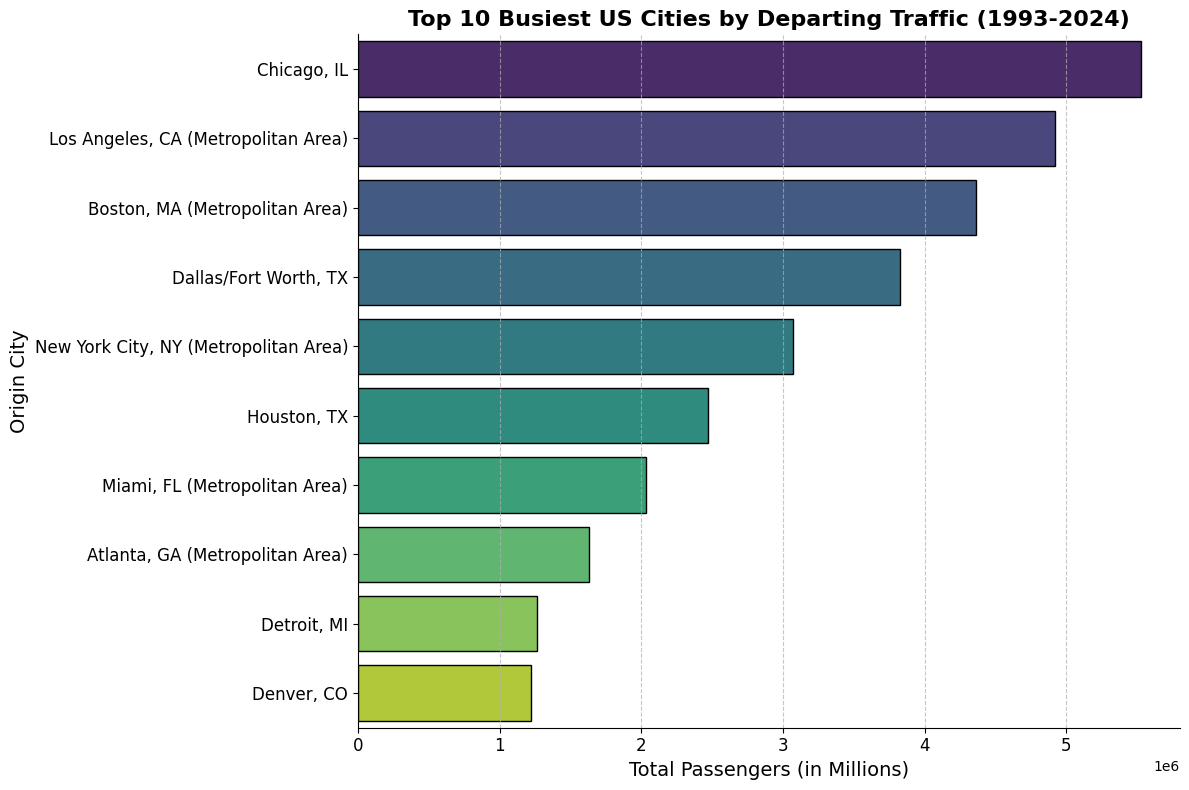

In [89]:
## Top 10 Busiest US Cities by Departing Traffic (1993-2024)

plt.figure(figsize=(12, 8))
top_cities = df.groupby('city1')['passengers'].sum().nlargest(10).reset_index()

sns.barplot(x='passengers', y='city1', data=top_cities,
            palette="viridis",  # Use a color palette
            edgecolor="black",  # Add black border to bars
            linewidth=1)  # Set border line width

plt.title('Top 10 Busiest US Cities by Departing Traffic (1993-2024)',
          fontsize=16, fontweight='bold')
plt.xlabel('Total Passengers (in Millions)', fontsize=14)
plt.ylabel('Origin City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

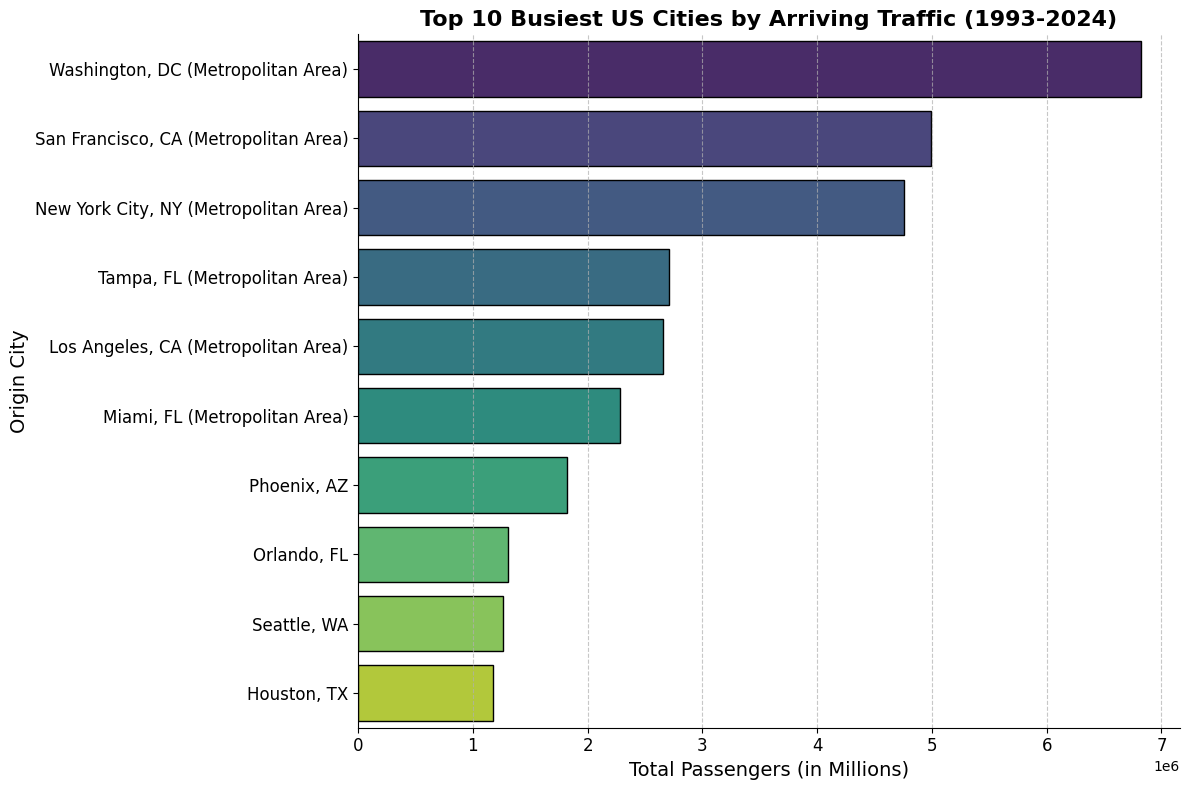

In [90]:
## Top 10 Busiest US Cities by Arriving Traffic (1993-2024)

plt.figure(figsize=(12, 8))
top_cities = df.groupby('city2')['passengers'].sum().nlargest(10).reset_index()

sns.barplot(x='passengers', y='city2', data=top_cities,
            palette="viridis",
            edgecolor="black",
            linewidth=1)

plt.title('Top 10 Busiest US Cities by Arriving Traffic (1993-2024)',
          fontsize=16, fontweight='bold')
plt.xlabel('Total Passengers (in Millions)', fontsize=14)
plt.ylabel('Origin City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

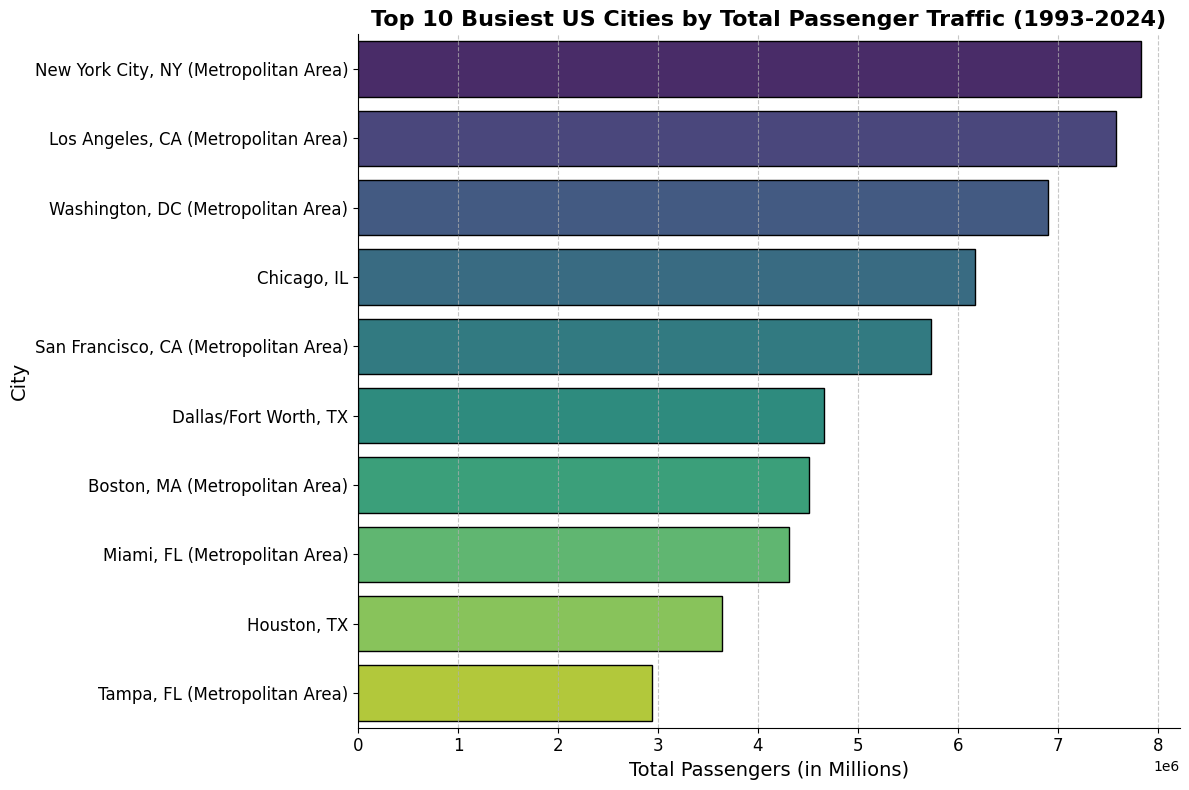

In [91]:
## Top 10 Busiest US Cities by Total Passenger Traffic (1993-2024)

city_passengers = pd.concat([df.groupby('city1')['passengers'].sum(),
                             df.groupby('city2')['passengers'].sum()]) \
                   .groupby(level=0).sum() \
                   .sort_values(ascending=False) \
                   .reset_index()

top_cities = city_passengers.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='passengers', y='index', data=top_cities,
            palette="viridis", edgecolor="black", linewidth=1)

plt.title('Top 10 Busiest US Cities by Total Passenger Traffic (1993-2024)',
          fontsize=16, fontweight='bold')
plt.xlabel('Total Passengers (in Millions)', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

## **3.7 Correlation Analysis**

In [74]:
def get_numerical_cols(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ['object' , 'category' , 'bool']]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    return num_cols


num_cols = get_numerical_cols(df)

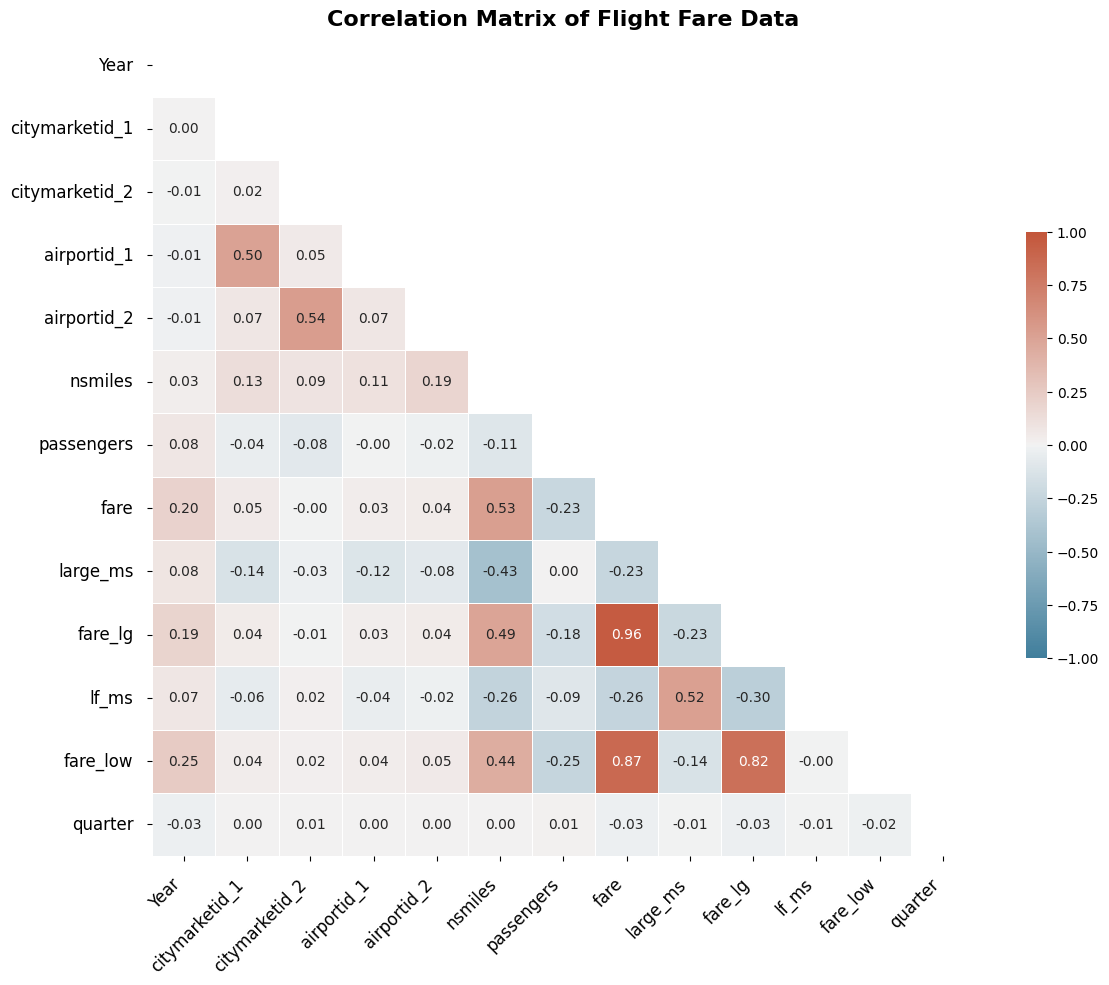

In [92]:
col_list_for_corr = num_cols + ["quarter"]

corr_matrix = df[col_list_for_corr].corr(numeric_only=True)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 10})

plt.title('Correlation Matrix of Flight Fare Data', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
ax.tick_params(axis='both', which='major', pad=10)
plt.tight_layout()
plt.show()

In [76]:
# Additionally, calculate the correlation between airfare and fuel price

fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])
fuel_df['Year'] = fuel_df['Date'].dt.year
fuel_df['Quarter'] = fuel_df['Date'].dt.quarter
avg_fuel_price_per_quarter = fuel_df.groupby(['Year', 'Quarter'])['Price'].mean().reset_index()

avg_fare_per_quarter = df.groupby(['Year', 'quarter'])['fare'].mean().reset_index()
avg_fare_per_quarter = avg_fare_per_quarter.rename(columns={'quarter': 'Quarter'})

# Merge and filter data for common quarters
merged_df = pd.merge(avg_fare_per_quarter, avg_fuel_price_per_quarter, on=['Year', 'Quarter'], how='inner')
merged_df['Year-Quarter'] = merged_df['Year'].astype(str) + '-Q' + merged_df['Quarter'].astype(str)

correlation_fuel_fare = merged_df['fare'].corr(merged_df['Price'])
print(f"Correlation between airfare and fuel price (quarterly average): {correlation_fuel_fare:.2f}")

Correlation between airfare and fuel price (quarterly average): 0.52


From the correlation analysis above, we can see that airfare does have some correlation with existing numerical features. Higher fuel price, longer distance, and less passengers tend to lead to higher fare price. Large carriers tend to dominate the market and affect the airfare the most, low-fare carriers can have less market share and more flexible pricing policy and thus lead to a weaker correlation.

# **4. Feature Engineering**

To improve model performance and enhance feature interpretability, we applied the following feature engineering steps:

- **Categorical Encoding**: We identified `quarter`, `citymarketid_1`, and `citymarketid_2` as categorical variables, despite being numeric in appearance. These, along with other nominal features such as `city1`, `airport_1`, and `carrier_lg`, were one-hot encoded to convert them into a format suitable for machine learning models.
- **Target Variable**: We selected `fare` as the prediction target, representing the average airfare for each route.
- **Train-Test Split**: The dataset was split into 80% for training and 20% for testing, ensuring unbiased model evaluation.
- **Feature Scaling**: Continuous numerical features were standardized using `StandardScaler` to ensure they are on the same scale, which benefits many machine learning algorithms.
- **Dimensionality Reduction**: PCA was applied to retain 95% of the variance while reducing the dimensionality of the feature space, helping to speed up model training and reduce the risk of overfitting.

This structured pipeline ensures that each feature is treated appropriately according to its type, resulting in a clean and model-ready dataset.


In [77]:
df_feature = df_clean.copy()
print(df_feature.columns.tolist())

['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2', 'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2', 'tbl1apk']


In [78]:
### Revised Feature Engineering (Based on Feature Type Analysis)

# Step 1: Copy the cleaned dataset
df_feature = df_clean.copy()

# Step 2: Identify categorical features
categorical_cols = [
    'quarter',
    'citymarketid_1',
    'citymarketid_2',
    'city1', 'city2',
    'airport_1', 'airport_2',
    'carrier_lg', 'carrier_low',
    'Geocoded_City1', 'Geocoded_City2'
]


categorical_cols = [col for col in categorical_cols if col in df_feature.columns]

# Apply One-Hot Encoding to categorical columns
df_feature = pd.get_dummies(df_feature, columns=categorical_cols, drop_first=True)

# Step 3: Define target variable
target_col = 'fare'
X = df_feature.drop(columns=[target_col])
y = df_feature[target_col]

# Step 4: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize only numeric columns
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Step 6: Optional - PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of numeric features: {X_train.shape[1]}")
print(f"After PCA: {X_train_pca.shape[1]}")

Original number of numeric features: 1418
After PCA: 8


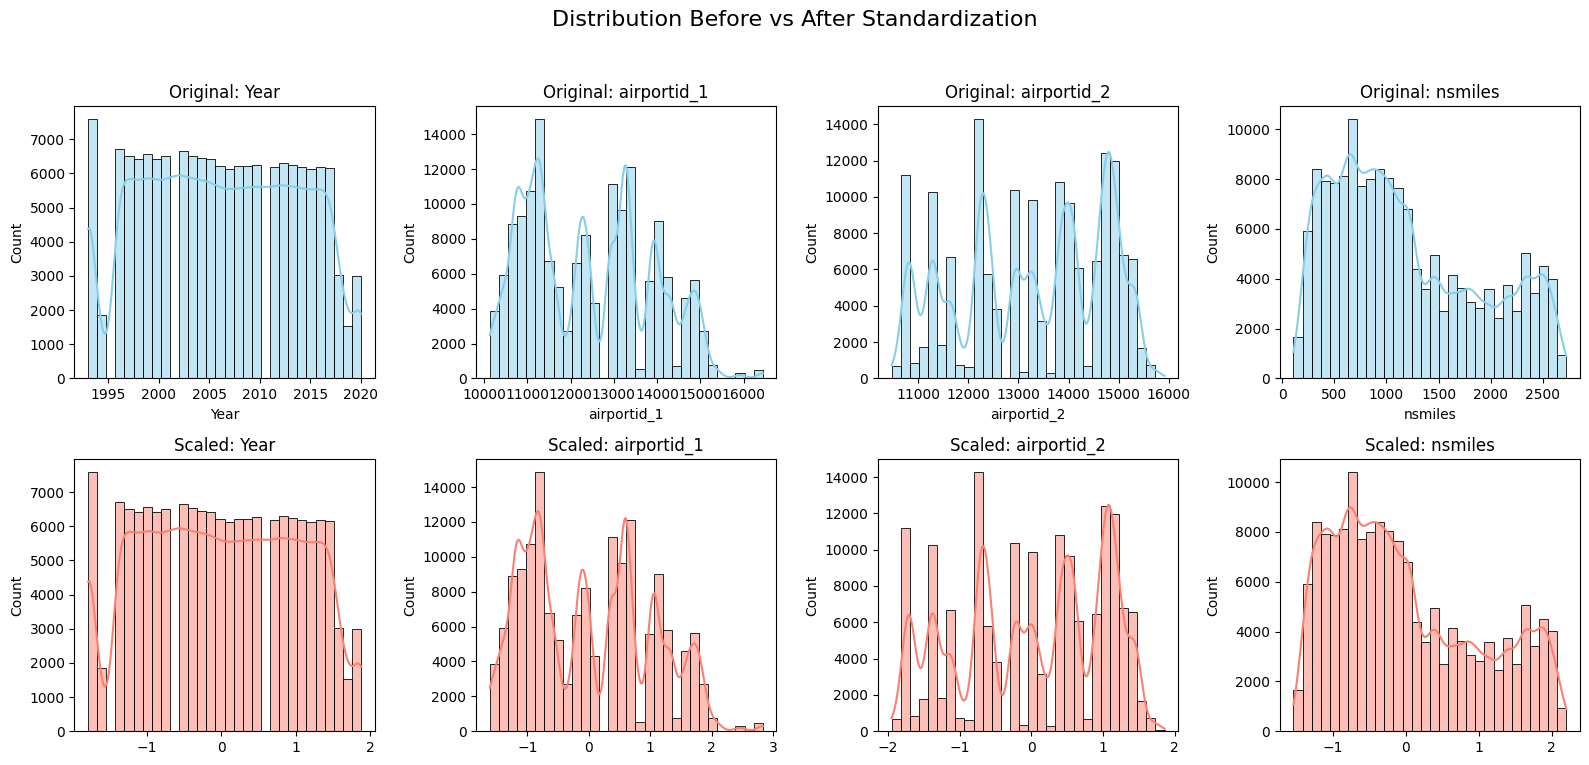

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few numeric features to visualize (to keep the plot clean)
selected_cols = numeric_cols[:4]  # Adjust the number as needed

# Create subplots: 2 rows (before/after), N columns (features)
fig, axes = plt.subplots(2, len(selected_cols), figsize=(16, 8))
fig.suptitle('Distribution Before vs After Standardization', fontsize=16)

for i, col in enumerate(selected_cols):
    # Plot original feature distribution (row 0)
    sns.histplot(X_train[col], bins=30, kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Original: {col}')

    # Plot standardized feature distribution (row 1)
    col_index = list(numeric_cols).index(col)
    sns.histplot(X_train_scaled[:, col_index], bins=30, kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'Scaled: {col}')

# Adjust spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Feature Engineering Summary

- We treated the following as **categorical variables** and applied One-Hot Encoding: `quarter`, `citymarketid_1`, `citymarketid_2`, and all text-based features such as city names, airports, and carriers.
- Continuous numerical variables such as `Year`, `nsmiles`, `passengers`, etc. were retained and **standardized using StandardScaler**.
- The dataset was then split into training and testing subsets (80/20).
- Finally, **Principal Component Analysis (PCA)** was applied to reduce dimensionality while preserving 95% of the data variance.

This setup ensures that all variables are in a format suitable for downstream modeling and that feature types are handled appropriately.


# **5. Modeling**

In [80]:
df = df_clean.copy()
df['quaters'] = df['quarter'].astype(int) + (df['Year'].astype(int) - 2000) * 4
new_df = df[['fare', 'nsmiles', 'quaters']].dropna()

X = new_df[['nsmiles', 'quaters']]
y = new_df['fare']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [82]:
log_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1, validate=True)

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression()),
])

pipe.fit(X_train, y_train)
print(f"R^2 socre: {pipe.score(X_test, y_test)}")
print(f"MSE socre: {mean_squared_error(y_test, pipe.predict(X_test))}")
print(f"model intercept: {pipe.named_steps['model'].intercept_}")
print(f"model coefficients: {pipe.named_steps['model'].coef_}")

def plot_prediction(model,X_test, y_test):
    y_test_pred = model.predict(X_test)
    # use plotly to plot y_train_pred and y_test_pred vs y_train and y_test
    fig = go.Figure()
    # control figure size
    fig.update_layout(width=800, height=800)
    fig.add_trace(go.Scatter(x=y_test, y=y_test_pred, mode='markers', name='test'))
    min_val = min(y_test.min(), y_test_pred.min())
    max_val = max(y_test.max(), y_test_pred.max())
    fig.update_xaxes(range=[min_val - 50, max_val + 50])
    fig.update_yaxes(range=[min_val - 50, max_val + 50])
    # add title and axis labels
    fig.update_layout(title='Prediction vs Actual',
                    xaxis_title='Actual',
                    yaxis_title='Prediction')
    fig.add_trace(go.Scatter(
                    x=[min_val, max_val],
                    y=[min_val, max_val],
                    mode='lines',
                    name='Ideal (y = x)',
                    line=dict(color='red', dash='dash')
    ))
    fig.show()
    return



# sample some points from X_test and y_test
X_test_sample = X_test.sample(100)
y_test_sample = y_test.loc[X_test_sample.index]
# plot the prediction
plot_prediction(pipe, X_test_sample, y_test_sample)



R^2 socre: 0.30598937368672985
MSE socre: 3328.0376524465564
model intercept: 132.99723359076805
model coefficients: [135.42843055  47.25294866]


As we can see, the baseline linear regression model has a very low R-squared value. This means that the model is not a good fit for the data.
We would like to further improve the performance by :
1. Adding more features, such as dealing with the categorical features and using the one-hot encoding technique.
2. Using more advanced machine learning algorithms, such as **kernel regression** and **gradient boosting trees**. These algorithms are designed to handle complex relationships between the features and the target variable. For example, kernel regression uses a kernel function to map the input features to a higher-dimensional space, while gradient boosting trees use a series of decision trees to build a strong predictive model. These algorithms can capture more complex relationships between the features and the target variable, which can lead to better performance than linear regression does.
3. Tuning the hyperparameters of the machine learning algorithms to improve their performance.

# **6. Project Management**
### 🗓️ Timeline & Milestones
| 📌 Task                                | 🗓️ Deadline | ✅ Status     | 💬 Notes |
|----------------------------------------|-------------|---------------|---------|
| Data acquisition and initial cleaning  | April 5     | ✅ Completed  | All raw data sources merged and cleaned |
| Exploratory Data Analysis (EDA)        | April 10    | ✅ Completed  | Key visuals and early insights generated |
| Baseline regression model              | April 12    | ✅ Completed  | Linear regression used as a baseline |
| Advanced model training (RF, XGBoost)  | April 20    | 🟡 In progress| Random Forest currently being tuned |
| Model evaluation and result visualization | April 25 | ⏳ Upcoming   | Will compare models using R² and RMSE |
| Final report writing and presentation  | April 30    | ⏳ Upcoming   | We’ll prepare slides, summary, and submit final deliverables |

### 📈 Progress Tracking

We are using a shared Google Colab and GitHub repository to:
- Track task completion status
- Share code updates and experiment logs
- Collaboratively edit the final presentation and written report

# **7. Hypothesis Testing**
To further validate our insights, we plan to conduct statistical hypothesis testing on key factors that may influence airfare pricing. The following hypotheses are proposed:

1. **Competition Hypothesis**  
   - **Null Hypothesis (H₀):** The level of market competition on a route has no significant correlation with average airfare.  
   - **Testing Method:** Correlation analysis and significance testing of regression coefficients will be used to evaluate the impact of competition intensity on pricing.

2. **Seasonality Hypothesis**  
   - **Null Hypothesis (H₀):** Seasonal variations in airfare do not differ significantly across routes with varying travel distances.  
   - **Testing Method:** Two-way ANOVA (Analysis of Variance) will be applied to examine the interaction effect between seasonality and route distance categories on airfare.

3. **Fuel Price Impact Hypothesis**  
   - **Null Hypothesis (H₀):** The influence of fuel price fluctuations on airfare does not vary significantly across different types of flight routes (e.g., short-haul vs. long-haul).  
   - **Testing Method:** Panel data regression analysis will be used to assess differential impacts of fuel price changes across route types over time.

# **8. Difficulty & Challenge**
todo ..


# **9. Conclusion & Future work**
todo ..
